# 모두의 딥러닝 20_GAN

https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/20_GAN.ipynb

In [1]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import librosa
import librosa.display
import soundfile as sf


C:\Users\nammr\anaconda3\envs\pj21\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
#이미지가 저장될 폴더가 없다면 만듭니다.
# import os
# if not os.path.exists("E:\\nmb\\gan_images"):
#     os.makedirs("E:\\nmb\\gan_image")

np.random.seed(3)
tf.random.set_seed(3)

In [3]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*14*14, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((14, 14, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25088)             2533888   
_________________________________________________________________
batch_normalization (BatchNo (None, 25088)             100352    
_________________________________________________________________
reshape (Reshape)            (None, 14, 14, 128)       0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0

In [4]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(56,56,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
# discriminator.trainable = True
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)            

In [5]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))                    # input
dis_output = discriminator(generator(ginput))   # output
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 56, 56, 1)         2840961   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 231681    
Total params: 3,072,642
Trainable params: 2,790,657
Non-trainable params: 281,985
_________________________________________________________________


In [6]:
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\concate\\total_fm_data.npy')
X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\f\\slr_f_data.npy')
x_train = []
for i in range (X_train.shape[0]) : 
    print(X_train[i].shape)
    img_resize = cv2.resize(X_train[i], (56,56))
    print(img_resize.shape)
    x_train.append(img_resize)
    
x_train = np.array(x_train)
x_train.shape    # (4680, 56, 56)

(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)
(128, 173)
(56, 56)


(4680, 56, 56)

In [7]:
from datetime import datetime
start = datetime.now()

#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # 데이터 불러오기
  X_train = x_train.reshape(x_train.shape[0], 56, 56, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  
  print(X_train.shape)   # (19184, 56, 56, 1)

  true = np.ones((batch_size, 1))   # 1로 라벨링
    # print(true.shape)     # (32, 1)
    # print(true)
  fake = np.zeros((batch_size, 1))  # 0으로 라벨링
    # print(fake.shape)     # (32, 1)
    # print(fake)

  d_loss_list = list()
  g_loss_list = list()

  for i in range(epoch):
        # [1] 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)    
            # 0부터 X_train.shape[0] 까지 batch_size개의 랜덤 값(정수형)을 반환한다.
            # print(idx.shape)        # (32,) == (batch_size, )
            # print(idx)
        imgs = X_train[idx]
            # print(imgs.shape)   # (32, 56, 56, 1)
            # print(imgs)

            # 실제 데이터 이미지 확인하기
            # imgs = np.array(imgs[0])
            # imgs = np.reshape(imgs,(128, 173))
            # print(imgs.shape)         # (128, 173)
            # plt.imshow(imgs,'gray')
            # plt.show()

            # batch_size : 한 에폭당 생성되는 이미지의 개수

        d_loss_real = discriminator.train_on_batch(imgs, true)
            # train_on_batch : fit() 과 유사한 기능을 함
            # fit()과 차이점 : 고정된 batch_size에 신경쓰지 않는다. 
            # generator는 매번 새로운 image를 전달해야 하기 때문에 새로운 데이터를 학습해야 한다.
            # 현재 전달받은 데이터를 활용해서 가중치를 계산한다.

       # [2] 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, 100))   
            # 평균이 0, 분산이 1인 표준 정규분포, 랜덤한 값을 반환해준다.
            # (batch_size, 100) 행렬로 반환
            # print(noise.shape)  # (32, 100)
            # print(noise)
        gen_imgs = generator.predict(noise)
            # print(gen_imgs.shape)     # (32, 56, 56, 1)
            # print(gen_imgs)

            # 실제 데이터 이미지 확인하기
            # gen_imgs = np.array(gen_imgs[0])
            # gen_imgs = np.reshape(gen_imgs,(28, 28))
            # print(gen_imgs.shape)           # (28, 28)
            # plt.imshow(gen_imgs,'gray')
            # plt.show()
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        #판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # 판별자 loss
        g_loss = gan.train_on_batch(noise, true)        # 생성자 loss
        print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # loss 값 저장하기
        d_loss_list.append(float(d_loss))
        g_loss_list.append(float(g_loss))

        # pandas dataframe
        d_loss_df = pd.DataFrame(d_loss_list)
        g_loss_df = pd.DataFrame(g_loss_list)

        d_loss_df.columns = ['d_loss']
        g_loss_df.columns = ['g_loss']

        gd_loss_df = pd.concat([d_loss_df, g_loss_df], axis = 1)

        gd_loss_df.to_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan04.csv', index = False)

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, 100))
                # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
                # print(gen_imgs.shape)   # (25, 28, 28, 1)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
                # Rescale images 0 - 1
            print(gen_imgs.shape) # (25, 56, 56, 1)
       
            # 다시 melspectrogram으로 바꾸기 (shape 맞추기)
            gen_mels = cv2.resize(gen_imgs[1], (128, 173))
            print(gen_mels.shape) # (173, 128)
            gen_mels = gen_mels.reshape(gen_mels.shape[1], gen_mels.shape[0] )
            print(gen_mels.shape) # (128, 173)

            # 다시 melspectrogram으로 바꾸기
            remels = librosa.feature.inverse.mel_to_audio (gen_mels,
                      sr=22050, hop_length=128, n_fft=512)
            print(remels.shape)   # (22016,)

            sf.write(f'E:\\nmb\\gan_image\\dcgan02\\{i}.wav', remels, 22050)

            # librosa.display.waveplot(remels, 22050)
            # plt.show()
  
            print("end")

epochs = 401
gan_train(epochs, 32, 200)

end = datetime.now()
time = end - start
print("작업 시간 : " , time)  

(4680, 56, 56, 1)
epoch:0  d_loss:0.6844  g_loss:0.7394
(25, 56, 56, 1)
(173, 128)
(128, 173)
(22016,)
end
epoch:1  d_loss:0.3093  g_loss:0.3283
epoch:2  d_loss:0.4935  g_loss:0.3153
epoch:3  d_loss:0.6112  g_loss:1.4518
epoch:4  d_loss:0.8033  g_loss:0.0164
epoch:5  d_loss:0.9745  g_loss:0.0055
epoch:6  d_loss:0.7470  g_loss:0.0841
epoch:7  d_loss:0.3271  g_loss:1.3085
epoch:8  d_loss:0.7481  g_loss:0.1843
epoch:9  d_loss:0.4073  g_loss:0.0841
epoch:10  d_loss:0.3887  g_loss:0.0841
epoch:11  d_loss:0.2882  g_loss:0.2099
epoch:12  d_loss:0.1798  g_loss:0.6438
epoch:13  d_loss:0.2197  g_loss:0.5795
epoch:14  d_loss:0.1801  g_loss:0.2431
epoch:15  d_loss:0.0995  g_loss:0.1387
epoch:16  d_loss:0.0661  g_loss:0.1177
epoch:17  d_loss:0.0342  g_loss:0.2118
epoch:18  d_loss:0.0184  g_loss:0.5580
epoch:19  d_loss:0.0171  g_loss:0.5579
epoch:20  d_loss:0.0118  g_loss:0.2572
epoch:21  d_loss:0.0053  g_loss:0.1188
epoch:22  d_loss:0.0039  g_loss:0.0730
epoch:23  d_loss:0.0026  g_loss:0.0611
epoch

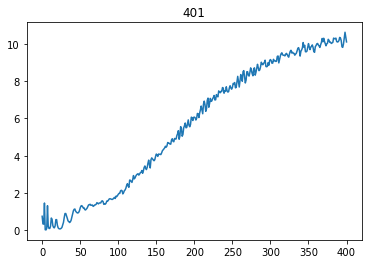

In [8]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan04.csv')
# print(loss_csv)
# print(loss_csv.shape)

# generator loss
plt.plot(loss_csv['g_loss'])

plt.title(epochs)
plt.show()


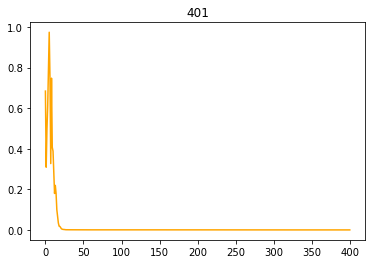

In [9]:
# discriminator loss
plt.plot(loss_csv['d_loss'], color='orange')

plt.title(epochs)
plt.show()